## Text Mining and NLP: Star Wars Movies Scripts

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
import nltk
from nltk.corpus import stopwords
import numpy as np

pd.set_option('display.max_columns',100)


In [2]:
ep4_df = pd.read_table("SW_EpisodeIV.txt", delimiter='" "', engine='python', names=['lineId', 'character', 'dialogue'], skiprows=1)
ep4_df = pd.DataFrame(ep4_df)
ep4_df.rename(columns = {'"character':'character'}, inplace = True)
ep4_df.rename(columns = {'dialogue"':'dialogue"'}, inplace = True)

ep5_df = pd.read_table("SW_EpisodeV.txt", delimiter='" "', engine='python', names=['lineId', 'character', 'dialogue'], skiprows=1)
ep5_df = pd.DataFrame(ep5_df)
ep5_df.rename(columns = {'"character':'character'}, inplace = True)
ep5_df.rename(columns = {'dialogue"':'dialogue"'}, inplace = True)

ep6_df = pd.read_table("SW_EpisodeVi.txt", delimiter='" "', engine='python', names=['lineId', 'character', 'dialogue'], skiprows=1)
ep6_df = pd.DataFrame(ep6_df)
ep6_df.rename(columns = {'"character':'character'}, inplace = True)
ep6_df.rename(columns = {'dialogue"':'dialogue"'}, inplace = True)



### 1 -Find the Characters with the Most Dialogues in Each Episode

In [3]:
# Count the number of dialogues for each character in each episode
ep4_char_dlg = ep4_df['character'].value_counts()
ep5_char_dlg = ep5_df['character'].value_counts()
ep6_char_dlg = ep6_df['character'].value_counts()

# Find the character with the most dialogues in each episode
most_dialogues_ep4 = ep4_char_dlg.idxmax()
most_dialogues_ep5 = ep5_char_dlg.idxmax()
most_dialogues_ep6 = ep6_char_dlg.idxmax()

print(f"Most Dialogues in Episode IV: {most_dialogues_ep4}")
print(f"Most Dialogues in Episode V: {most_dialogues_ep5}")
print(f"Most Dialogues in Episode VI: {most_dialogues_ep6}")

# display top 5 counts
dialogues_ep4_4 = ep4_char_dlg.sort_values(ascending=False).head(5)
dialogues_ep5_5= ep5_char_dlg.sort_values(ascending=False).head(5)
dialogues_ep6_6= ep6_char_dlg.sort_values(ascending=False).head(5)

Most Dialogues in Episode IV: LUKE
Most Dialogues in Episode V: HAN
Most Dialogues in Episode VI: HAN


In [4]:
dialogues_ep4_4

character
LUKE        254
HAN         153
THREEPIO    119
BEN          82
LEIA         57
Name: count, dtype: int64

In [5]:
dialogues_ep5_5

character
HAN         182
LUKE        128
LEIA        114
THREEPIO     92
LANDO        61
Name: count, dtype: int64

In [6]:
dialogues_ep6_6

character
HAN         124
LUKE        112
THREEPIO     90
LEIA         56
VADER        43
Name: count, dtype: int64

### 2 -Plot the Number of Dialogues per Character

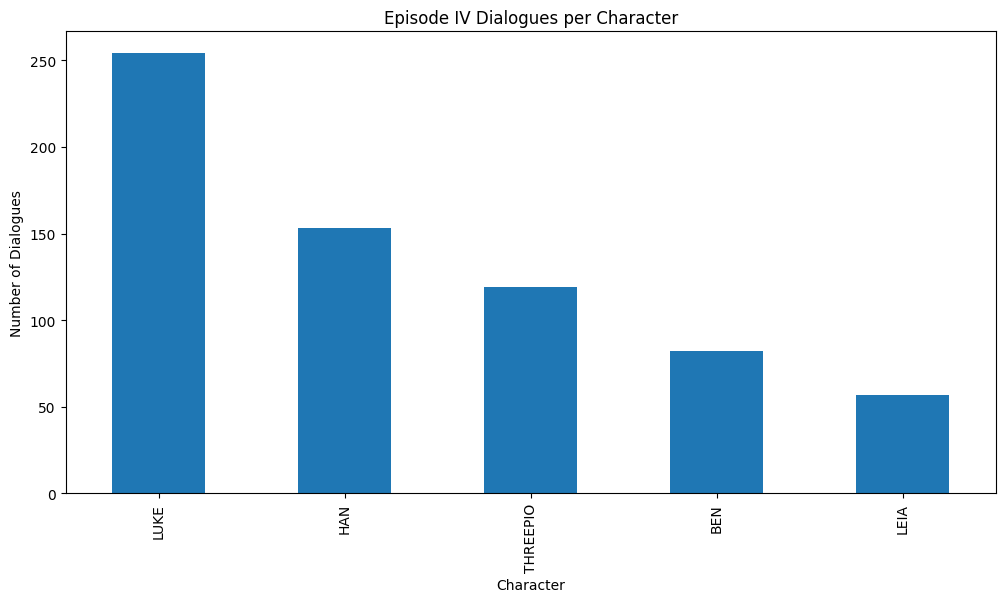

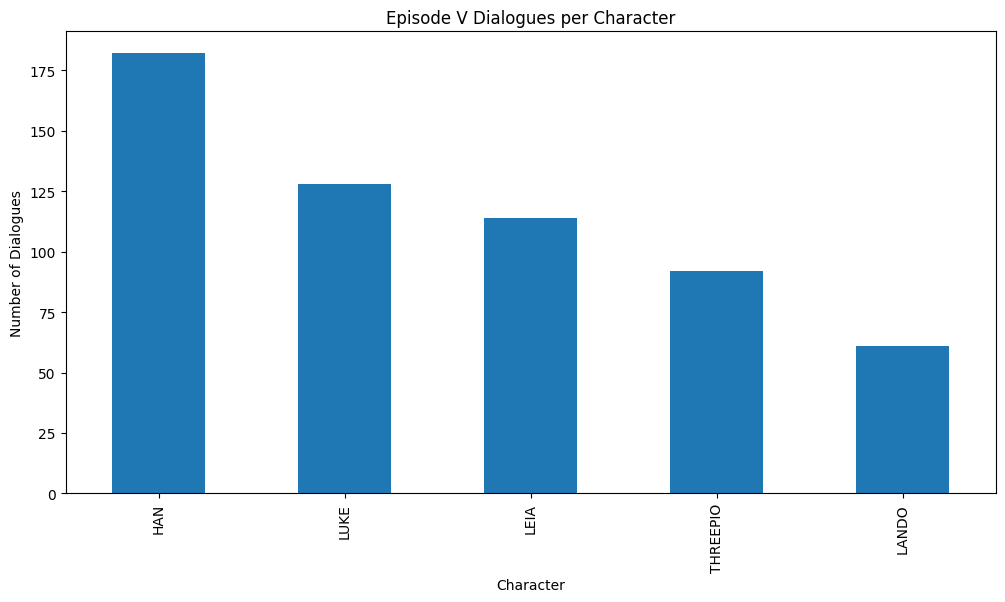

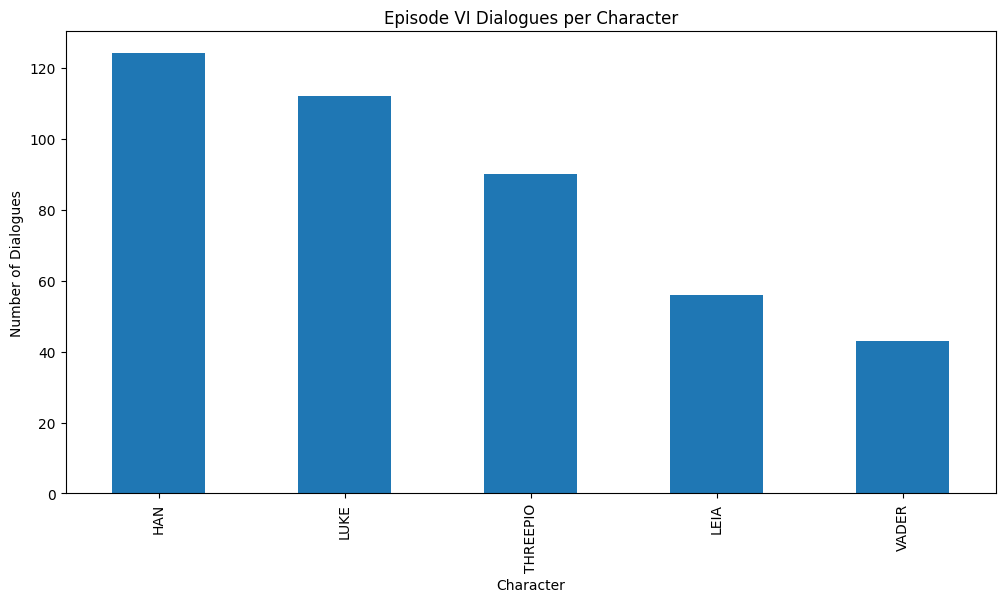

In [7]:


# Plot the number of dialogues for each character in each episode
def plot_dialogues(character_dialogues, title):
    character_dialogues.plot(kind='bar', figsize=(12, 6))
    plt.title(title)
    plt.xlabel('Character')
    plt.ylabel('Number of Dialogues')
    plt.show()

plot_dialogues(dialogues_ep4_4, 'Episode IV Dialogues per Character')
plot_dialogues(dialogues_ep5_5, 'Episode V Dialogues per Character')
plot_dialogues(dialogues_ep6_6, 'Episode VI Dialogues per Character')


### 3 -Add "episode" Column and Concatenate Datasets

In [8]:
# Add episode column
ep4_df['episode'] = 'IV'
ep5_df['episode'] = 'V'
ep6_df['episode'] = 'VI'

# Concatenate datasets
merged_df = pd.concat([ep4_df, ep5_df, ep6_df])

# Inspect the concatenated data
print(merged_df.head())


  lineId character                                           dialogue episode
0     "1  THREEPIO  Did you hear that?  They've shut down the main...      IV
1     "2  THREEPIO                                     We're doomed!"      IV
2     "3  THREEPIO  There'll be no escape for the Princess this ti...      IV
3     "4  THREEPIO                                      What's that?"      IV
4     "5  THREEPIO  I should have known better than to trust the l...      IV


### 4- Frequency Distribution of Words in The Original Trilogy

- Break down the text into individual words (tokens)
- Count the occurrences of each word
- Calculate the frequency distribution of words.
- Present the frequency distribution using graphs or charts to visualize the data.

### 4- Discover the frequency distribution of words in The Original Trilogy

In [9]:
import re
tokens = []
for sentence in merged_df.dialogue:
    # Convert to lowercase and remove punctuation marks
    sentence = re.sub(r'[^\w\s]', '', sentence.lower())
    # Split into words
    words = sentence.split()
    tokens.extend(words)

# Count the frequency of each word
word_freq = Counter(tokens)

# Specify the number of most repeated words you want to display in the plot
num_words = 15

# Select the top num_words words from the frequency distribution
top_words = dict(word_freq.most_common(num_words))
# Convert the dictionary to a DataFrame
top_words_df = pd.DataFrame(list(top_words.items()), columns=['Word', 'Frequency'])

# Display the DataFrame
print(top_words_df)


    Word  Frequency
0    the        911
1    you        896
2      i        674
3     to        644
4      a        436
5     of        351
6     it        326
7   your        288
8     is        273
9     be        246
10  this        246
11    in        244
12   and        241
13  that        227
14    on        227


### 5 -Create a Frequency Distribution plot of the most repeated words in The Original Trilogy

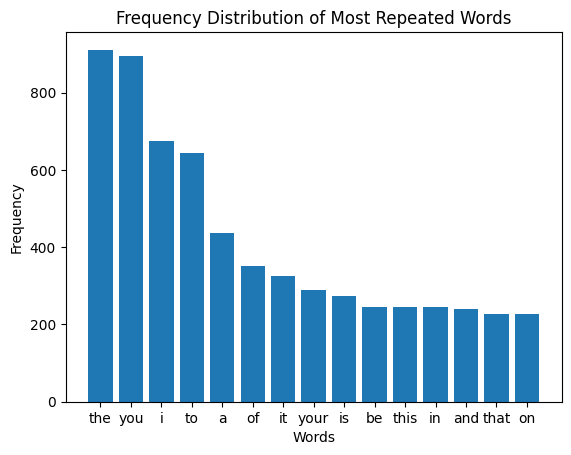

In [10]:
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Most Repeated Words')
plt.show()


### Text-Mining Operations

- Convert to lower case, word tokenization, removing stopwords, lexicon normalization (lemmatization), etc.
- Add the resulting array list to the dataset as a new column, “new_script”

In [12]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))

# Remove null values in Dialog
merged_df['dialogue'] = merged_df['dialogue'].fillna('')


# Convert to lowercase
Lowercase = merged_df['dialogue'].str.lower().apply(word_tokenize)
merged_df['new_script'] = Lowercase

# Tokenization
tokenize = merged_df['new_script'].apply(lambda tokens: ' '.join(tokens))
merged_df['new_script'] = tokenize

# Replace special charactors
stopmarks = merged_df['new_script'].str.replace(r"[^\w\s]|_", '', regex=True)
merged_df['new_script'] = stopmarks

# Remove Single Letters
single_letters = merged_df['new_script'].apply(lambda text: ' '.join([word for word in text.split() if len(word) > 1 and not word.isdigit()]))
merged_df['new_script'] = single_letters

# Remove 'nt', 're', 'll','ve'
unw = merged_df['new_script'].apply(lambda text: ' '.join([word for word in text.split() if word not in ['nt', 're', 'll','ve']]))
merged_df['new_script'] = unw

def lemmatize_text(text):
    words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(lemmatized_words) 

# perform lemmatization
lemmatizer = WordNetLemmatizer()
lemmatization = merged_df['new_script'].apply(lemmatize_text)
merged_df['new_script'] = lemmatization
merged_df

,lineId,character,dialogue,episode,new_script
0,"""1",THREEPIO,Did you hear that? They've shut down the main...,IV,hear shut main reactor destroyed sure madness
1,"""2",THREEPIO,"We're doomed!""",IV,doomed
2,"""3",THREEPIO,There'll be no escape for the Princess this ti...,IV,escape princess time
3,"""4",THREEPIO,"What's that?""",IV,
4,"""5",THREEPIO,I should have known better than to trust the l...,IV,known better trust logic halfsized thermocapsu...
...,...,...,...,...,...
669,"""670",LANDO,"Wedge, I don't think we're going to make it.""",VI,wedge think going make
670,"""671",WEDGE,"You'll make it. Just follow me Gold Leader.""",VI,make follow gold leader
671,"""672",LANDO,I promised to return his ship without a scratc...,VI,promised return ship without scratch sure hope...
672,"""673",HAN,"Lando...""",VI,lando


### 7 Repeat steps 4 & 5 but check the frequency distribution of the “new_script” this time.

In [ ]:
import re
tokens = []
for sentence in merged_df.new_script:
    # Convert to lowercase and remove punctuation marks
    sentence = re.sub(r'[^\w\s]', '', sentence.lower())
    # Split into words
    words = sentence.split()
    tokens.extend(words)

# Count the frequency of each word
word_freq = Counter(tokens)

# Specify the number of most repeated words you want to display in the plot
num_words = 15

# Select the top num_words words from the frequency distribution
top_words = dict(word_freq.most_common(num_words))
# Convert the dictionary to a DataFrame
top_words_df = pd.DataFrame(list(top_words.items()), columns=['Word', 'Frequency'])

# Display the DataFrame
print(top_words_df)

     Word  Frequency
0    luke        136
1     get        130
2   going        121
3    come        113
4   right        113
5    know        111
6      oh        111
7     sir         91
8    well         91
9     see         89
10     go         89
11      u         83
12  artoo         81
13    got         81
14   good         79


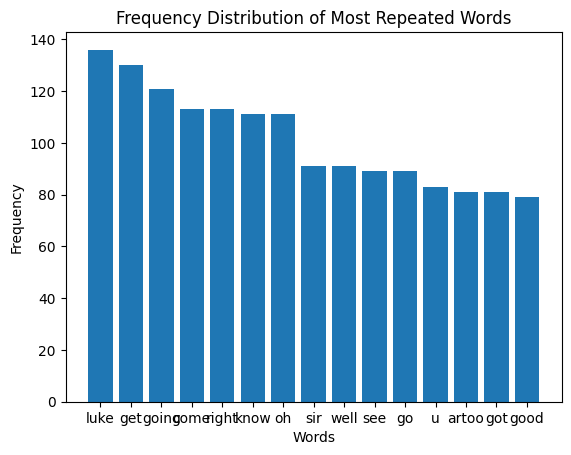

In [ ]:
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Most Repeated Words')
plt.show()

### 8 -Use Word Clouds to visually represent the most repeated words for Darth Vader and Yoda. 

### Word Clouds for Darth Vader and Yoda

- Use Word Clouds to visually represent the most repeated words for Darth Vader and Yoda. 

['THREEPIO' 'LUKE' 'IMPERIAL OFFICER' 'VADER' 'REBEL OFFICER' 'TROOPER'
 'CHIEF PILOT' 'CAPTAIN' 'WOMAN' 'FIXER' 'CAMIE' 'BIGGS' 'DEAK' 'LEIA'
 'COMMANDER' 'SECOND OFFICER' 'FIRST TROOPER' 'SECOND TROOPER' 'BERU'
 'OWEN' 'AUNT BERU' 'BEN' 'TAGGE' 'MOTTI' 'TARKIN' 'BARTENDER' 'CREATURE'
 'HUMAN' 'HAN' 'GREEDO' 'JABBA' 'OFFICER CASS'
 'VOICE OVER DEATH STAR INTERCOM' 'OFFICER' 'VOICE' 'GANTRY OFFICER'
 'INTERCOM VOICE' 'TROOPER VOICE' 'FIRST OFFICER' 'WILLARD'
 'DEATH STAR INTERCOM VOICE' 'DODONNA' 'GOLD LEADER' 'WEDGE' 'MAN'
 'RED LEADER' 'CHIEF' 'MASSASSI INTERCOM VOICE' 'RED TEN' 'RED SEVEN'
 'PORKINS' 'RED NINE' 'RED ELEVEN' 'ASTRO-OFFICER' 'CONTROL OFFICER'
 'GOLD FIVE' 'GOLD TWO' 'WINGMAN' 'BASE VOICE' 'TECHNICIAN' 'RIEEKAN'
 'DECK OFFICER' 'ASSISTANT OFFICER' 'LIEUTENANT' 'DERLIN' 'ZEV'
 'ANNOUNCER' 'SENIOR CONTROLLER' 'PIETT' 'OZZEL' 'REBEL CAPTAIN'
 'REBEL FIGHTER' 'MEDICAL DROID' 'CONTROLLER' 'VEERS' 'HOBBIE' 'PILOTS'
 'WOMAN CONTROLLER' 'DACK' 'TRENCH OFFICER' 'JANSON' 'HEAD C

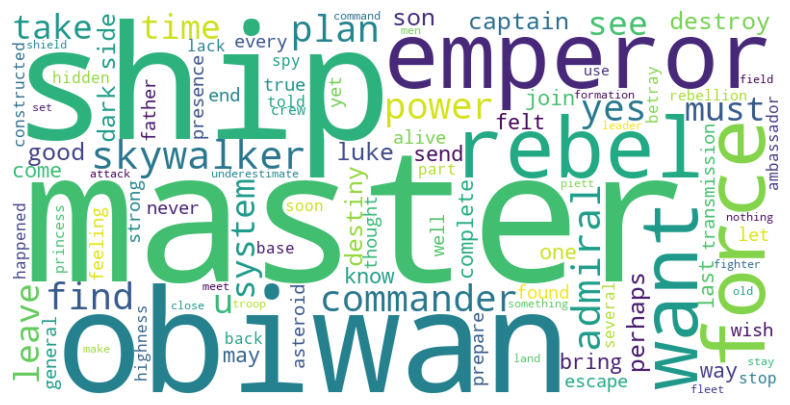

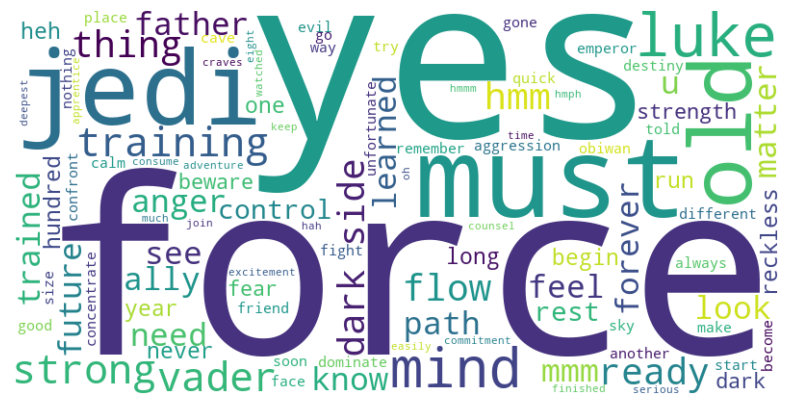

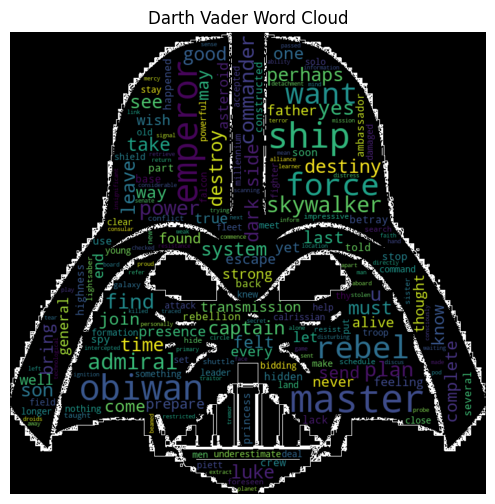

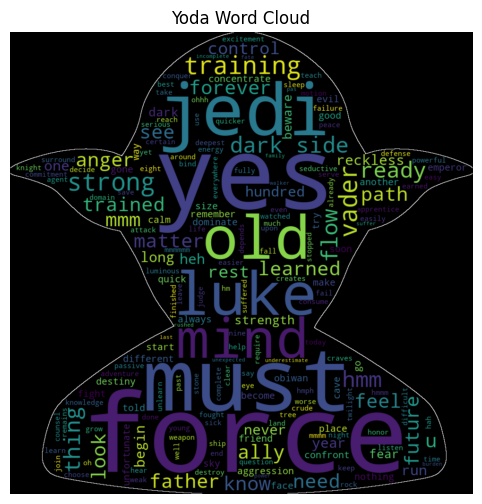

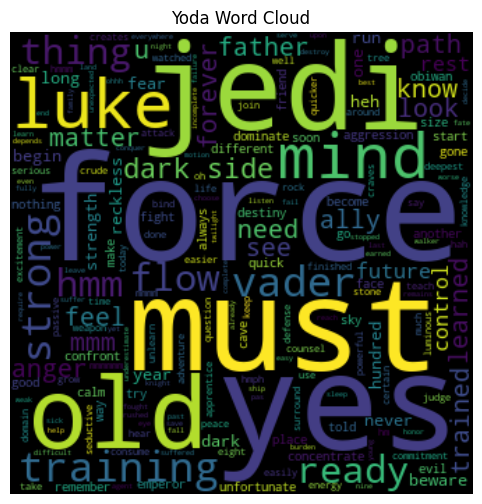

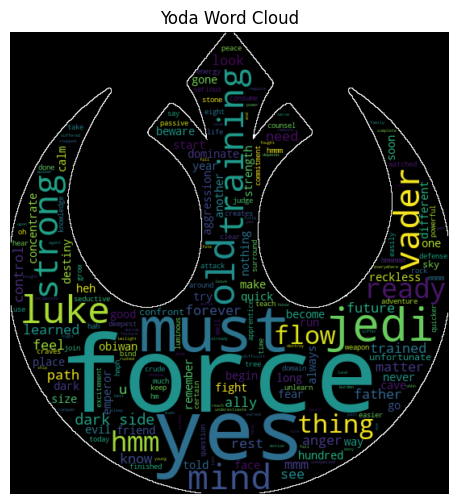

In [ ]:
from PIL import Image
# Step 1: Inspect the character names in the dataset
unique_characters = merged_df['character'].unique()
print(unique_characters)

# Step 2: Filter dialogues for each character after verifying the correct names
# Based on the inspection, adjust the names if necessary
vader_name = "VADER"  # Adjust this if needed
yoda_name = "YODA"    # Adjust this if needed

# Step 3: Filter dialogues for "Darth Vader" and "Yoda"
vader_dialogues = ' '.join(merged_df[merged_df['character'] == vader_name]['new_script'])
yoda_dialogues = ' '.join(merged_df[merged_df['character'] == yoda_name]['new_script'])

# Check if the dialogues are empty
print(f"Darth Vader dialogues: {vader_dialogues[:100]}")  # Print the first 100 characters
print(f"Yoda dialogues: {yoda_dialogues[:100]}")          # Print the first 100 characters

# Generate word clouds only if the dialogues are not empty
vader_mask = np.array(Image.open('vader.jpg'))
yoda_mask = np.array(Image.open('yoda.png'))
r2d2_mask = np.array(Image.open('r2d2.png'))
rebel_alliance_mask = np.array(Image.open('rebel_alliance.png'))


def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(vader_dialogues)
generate_wordcloud(yoda_dialogues)

# Generate word clouds using masks
if vader_dialogues:
    vader_wordcloud = WordCloud(width=800, height=400, background_color='black', mask=vader_mask,
                                 contour_color='white', contour_width=1).generate(vader_dialogues)
    plt.figure(figsize=(12, 6))
    plt.imshow(vader_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Darth Vader Word Cloud')
    plt.show()
else:
    print("No dialogues found for Darth Vader.")

if yoda_dialogues:
    yoda_wordcloud = WordCloud(width=800, height=400, background_color='black', mask=yoda_mask,
                                contour_color='white', contour_width=1).generate(yoda_dialogues)
    plt.figure(figsize=(12, 6))
    plt.imshow(yoda_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Yoda Word Cloud')
    plt.show()
else:
    print("No dialogues found for Yoda.")


if yoda_dialogues:
    yoda_wordcloud = WordCloud(width=800, height=400, background_color='black', mask=r2d2_mask,
                                contour_color='white', contour_width=1).generate(yoda_dialogues)
    plt.figure(figsize=(12, 6))
    plt.imshow(yoda_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Yoda Word Cloud')
    plt.show()
else:
    print("No dialogues found for Yoda.")


if yoda_dialogues:
    yoda_wordcloud = WordCloud(width=800, height=400, background_color='black', mask=rebel_alliance_mask,
                                contour_color='white', contour_width=1).generate(yoda_dialogues)
    plt.figure(figsize=(12, 6))
    plt.imshow(yoda_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Yoda Word Cloud')
    plt.show()
else:
    print("No dialogues found for Yoda.")

### TF-IDF Model

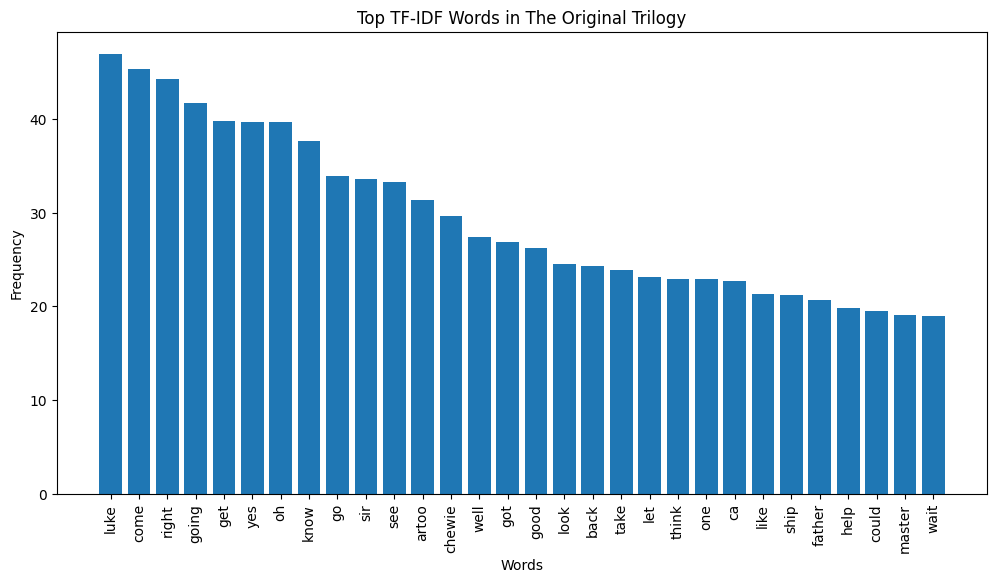

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(merged_df['new_script'])

# Get feature names
features = vectorizer.get_feature_names_out()

# Sum TF-IDF values for each word
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_freq = dict(zip(features, tfidf_scores))

# Plot top TF-IDF scores
plot_word_freq(Counter(tfidf_freq), 'Top TF-IDF Words in The Original Trilogy')


### Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kanchana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


  lineId character                                           dialogue episode  \
0     "1  THREEPIO  Did you hear that?  They've shut down the main...      IV   
1     "2  THREEPIO                                     We're doomed!"      IV   
2     "3  THREEPIO  There'll be no escape for the Princess this ti...      IV   
3     "4  THREEPIO                                      What's that?"      IV   
4     "5  THREEPIO  I should have known better than to trust the l...      IV   

                                          new_script  sentiment  
0      hear shut main reactor destroyed sure madness    -0.2942  
1                                             doomed     0.0000  
2                               escape princess time    -0.1280  
3                                                        0.0000  
4  known better trust logic halfsized thermocapsu...     0.7351  


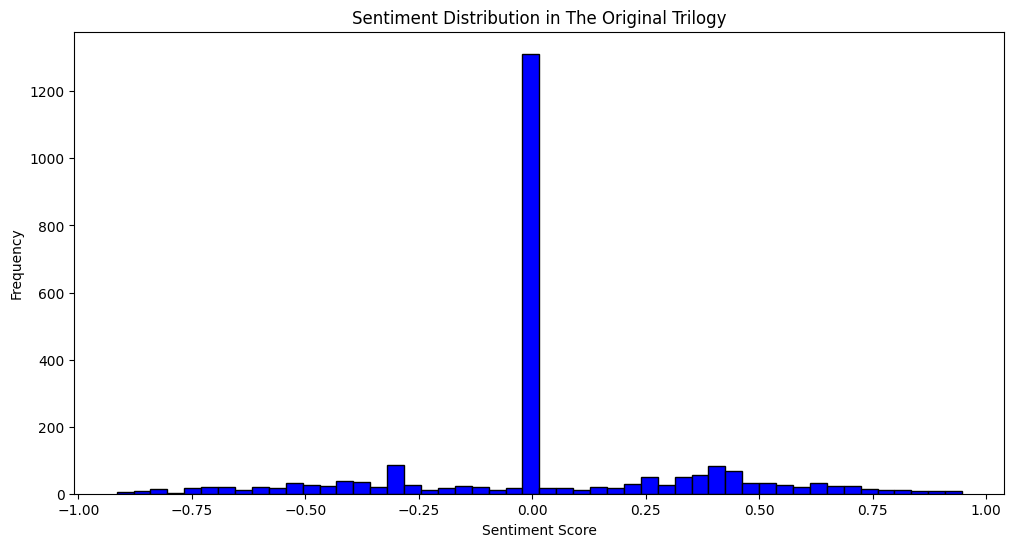

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
merged_df['sentiment'] = merged_df['dialogue'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Inspect sentiment scores
print(merged_df.head())

# Plot sentiment distribution
plt.figure(figsize=(12, 6))
plt.hist(merged_df['sentiment'], bins=50, color='blue', edgecolor='black')
plt.title('Sentiment Distribution in The Original Trilogy')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


- The high central peak at 0 suggests that many dialogues are neutral, possibly containing a mix of both positive and negative elements, or are more factual/neutral in nature.
- The spread of positive sentiment scores indicates that the dialogues in the trilogy tend to lean towards positive emotions, although not strongly positive.
- The spread of negative sentiment scores indicates the presence of negative emotions, although they are also not strongly negative.